In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [4]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Use one-hot encoding to convert categorical columns into numerical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()
correlation_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388,0.001776,0.012984,0.013690,0.005459,0.023698,-0.019956,-0.013939,-0.001403,0.007812,0.011426,0.001004
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257,-0.027623,-0.010659,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904,0.021275,-0.004597,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914,0.085717,-0.003343,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945,0.054580,0.011489,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,-0.026020,-0.011802,0.341695,-0.028602,0.208029,0.072701,-0.448674,-0.000122,0.107031,0.107964,0.088324
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000,0.009117,-0.003166,0.108340,-0.014882,0.011888,0.062168,-0.083869,0.015458,0.064556,-0.004129,0.008939
gender_Male,0.001776,-0.027623,0.021275,0.085717,0.054580,-0.026020,0.009117,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477
gender_Other,0.012984,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978
ever_married_Yes,0.013690,0.679125,0.164243,0.114644,0.155068,0.341695,0.108340,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226


Text(0.5, 1.0, 'Correlation between different fearures')

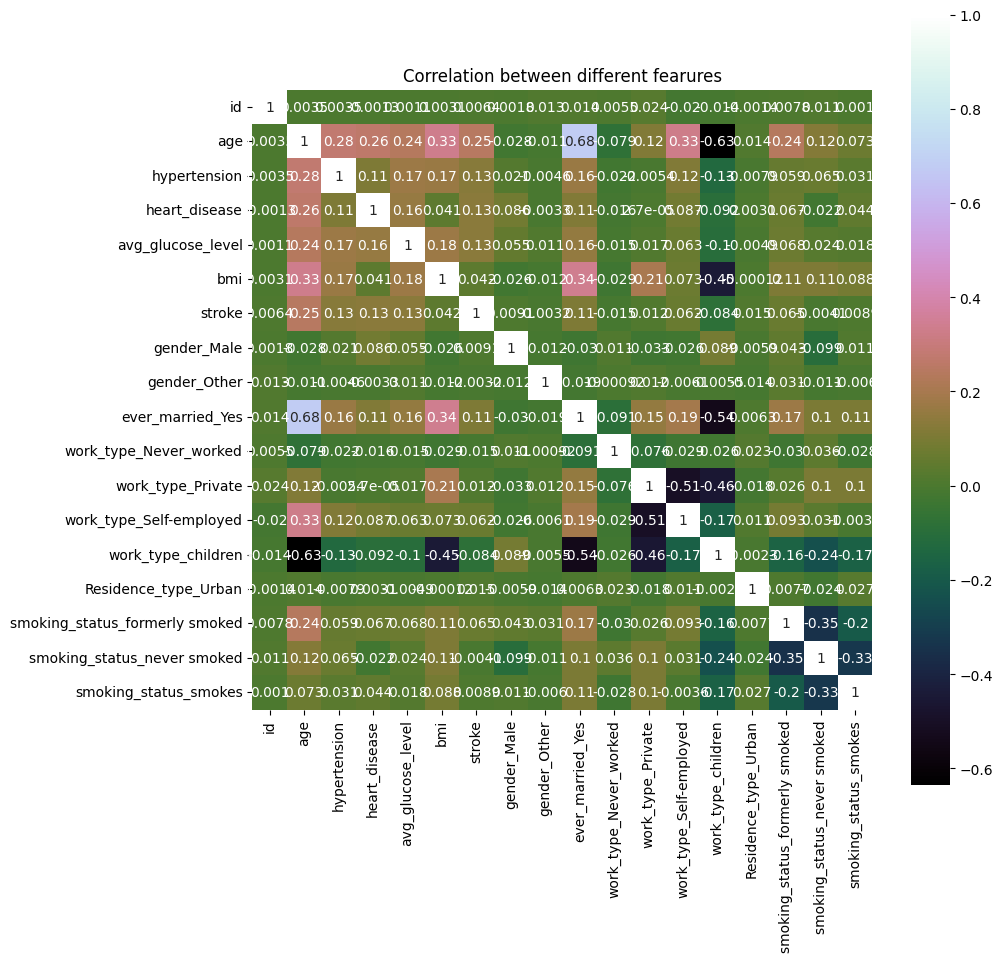

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [8]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [9]:
avg_glucose=df.groupby('avg_glucose_level').sum()
avg_glucose

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
avg_glucose_level,,,,,,,,,,,
55.12,60562,Female,21.0,0,0,No,Private,Rural,21.8,never smoked,0
55.22,37404,Male,42.0,0,0,Yes,Private,Urban,27.0,never smoked,0
55.23,43028,Male,66.0,0,0,Yes,Self-employed,Rural,28.9,Unknown,0
55.25,61300,Male,20.0,0,0,No,Private,Urban,20.4,never smoked,0
55.26,72547,Male,61.0,0,0,Yes,Private,Rural,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
266.59,27626,Female,60.0,0,0,No,Govt_job,Rural,25.5,never smoked,0
267.60,10995,Male,76.0,1,0,Yes,Private,Rural,30.5,never smoked,0
267.61,26267,Female,76.0,0,0,Yes,Self-employed,Urban,27.9,smokes,0


# **PCA**

# Import the necessary libraries

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Dataset

In [11]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [12]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
# Handle missing values (use mean, median, or mode based on the nature of the data)
df1=data.fillna(method ='ffill', inplace = True)

In [14]:
# Splitting the dataset
X = data.drop('stroke', axis=1)  # Assuming 'stroke' is the column name for the outcome variable
y = data['stroke']

# Data Standardisation

In [15]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: 'Male'

# Computing Eigen Vectors and Eigen value with the help of Covariance Matrix

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)
print(cov_matrix)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues

In [ ]:
print(eigenvectors)

In [ ]:
# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print('The Sorted Eigenvalues are:',eigenvalues_sorted)

print('The Sorted Eigenvectors are:',eigenvectors_sorted)

In [ ]:
# Let's say you want the projection on the top 2 principal components
N = 2
top_n_eigenvectors = eigenvectors_sorted[:, :N]
top_n_eigenvectors

In [ ]:
# Transform the data
X_pca_manual = X_scaled.dot(top_n_eigenvectors)
X_pca_manual

In [ ]:
from sklearn.decomposition import PCA

# Decide on the number of components or let PCA decide.
# For demonstration purposes, let's take the top 2 components.
pca = PCA()

# Fit and transform the standardized data.
X_pca_sklearn = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()  # You can provide a number to n_components if you have a target dimensionality
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

In [ ]:
import matplotlib.pyplot as plt

# Plot explained variance by each component
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Optionally, visualize the data in the first two principal components:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # color by target
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Stroke Prediction Dataset')
plt.colorbar()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plotting the variance explained by each component
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Visualizing the data in the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_sklearn[:, 2], X_pca_sklearn[:, 3], c=y, cmap='viridis')  # color by target
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA (with scikit-learn) of Stroke Prediction Dataset')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_pca_sklearn)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,11,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')